In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('data.csv')

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Y
0,0.669422,0.636364,0.648760,0.685950,0.710744,0.760331,0.768595,0.805785,0.793388,0.809917,...,0.223140,0.219008,0.115702,0.090909,0.090909,0.095041,0.086777,0.082645,0.074380,13
1,0.768595,0.756198,0.743802,0.743802,0.752066,0.747934,0.735537,0.702479,0.714876,0.747934,...,0.061983,0.152893,0.247934,0.417355,0.533058,0.504132,0.483471,0.628099,0.652893,30
2,0.371901,0.347107,0.367769,0.380165,0.417355,0.438017,0.462810,0.553719,0.636364,0.685950,...,0.640496,0.669422,0.652893,0.685950,0.714876,0.723140,0.706612,0.681818,0.549587,34
3,0.280992,0.359504,0.404959,0.446281,0.549587,0.578512,0.607438,0.652893,0.665289,0.719008,...,0.847107,0.888430,0.607438,0.438017,0.690083,0.611570,0.537190,0.260331,0.144628,19
4,0.376033,0.475207,0.574380,0.640496,0.661157,0.698347,0.723140,0.747934,0.772727,0.780992,...,0.347107,0.355372,0.355372,0.293388,0.185950,0.305785,0.380165,0.363636,0.417355,24


In [33]:
df.shape[1]//2

2048

In [34]:
X=df.drop('Y',axis=1)

In [35]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.669422,0.636364,0.648760,0.685950,0.710744,0.760331,0.768595,0.805785,0.793388,0.809917,...,0.227273,0.223140,0.219008,0.115702,0.090909,0.090909,0.095041,0.086777,0.082645,0.074380
1,0.768595,0.756198,0.743802,0.743802,0.752066,0.747934,0.735537,0.702479,0.714876,0.747934,...,0.157025,0.061983,0.152893,0.247934,0.417355,0.533058,0.504132,0.483471,0.628099,0.652893
2,0.371901,0.347107,0.367769,0.380165,0.417355,0.438017,0.462810,0.553719,0.636364,0.685950,...,0.590909,0.640496,0.669422,0.652893,0.685950,0.714876,0.723140,0.706612,0.681818,0.549587
3,0.280992,0.359504,0.404959,0.446281,0.549587,0.578512,0.607438,0.652893,0.665289,0.719008,...,0.500000,0.847107,0.888430,0.607438,0.438017,0.690083,0.611570,0.537190,0.260331,0.144628
4,0.376033,0.475207,0.574380,0.640496,0.661157,0.698347,0.723140,0.747934,0.772727,0.780992,...,0.326446,0.347107,0.355372,0.355372,0.293388,0.185950,0.305785,0.380165,0.363636,0.417355


In [36]:
X.shape

(400, 4096)

In [37]:
# Split the data into training and testing based on Y values
train_data = df[df['Y'] <38]
test_data = df[df['Y'] >= 38]

# Drop the label column 'Y'
train_data = train_data.drop('Y', axis=1)
test_data = test_data.drop('Y', axis=1)

# Correctly split X_train and Y_train
X_train = train_data.iloc[:, :df.shape[1]//2]  # Pixels 0 to 2047 (upper half)
Y_train = train_data.iloc[:, df.shape[1]//2:] # Pixels 2048 to 4095 (lower half)

# Correctly split X_test and Y_test
X_test = test_data.iloc[:, :df.shape[1]//2]   # Pixels 0 to 2047 (upper half)
Y_test = test_data.iloc[:, df.shape[1]//2:]  # Pixels 2048 to 4095 (lower half)


In [38]:
print("X_train shape:", X_train.shape)  # Should be (n_samples_train, 2048)
print("Y_train shape:", Y_train.shape)  # Should be (n_samples_train, 2048)
print("X_test shape:", X_test.shape)    # Should be (n_samples_test, 2048)
print("Y_test shape:", Y_test.shape)    # Should be (n_samples_test, 2048)


X_train shape: (380, 2048)
Y_train shape: (380, 2048)
X_test shape: (20, 2048)
Y_test shape: (20, 2048)


In [39]:
import matplotlib.pyplot as plt

In [40]:
pixels = (32, 64)

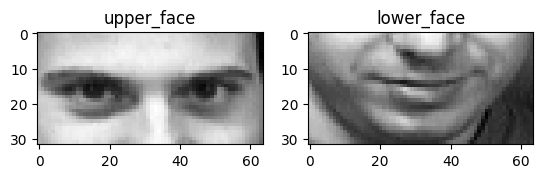

In [41]:
import random
sample_index = random.randint(0, X_train.shape[0])  # Random
upper_face = X_train.iloc[sample_index].values  # Extract upper face pixels (0-2047)
lower_face = Y_train.iloc[sample_index].values  # Extract lower face pixels (2048-4095)

# Reshape the 1D array into a 32x64 image
upper_face_image = upper_face.reshape(pixels[0],pixels[1])
lower_face_image = lower_face.reshape(pixels[0], pixels[1])

dic = {'upper_face': upper_face_image, 'lower_face': lower_face_image}
# Plot the upper face
for i, (title, face) in enumerate(dic.items()):
    plt.subplot(1, 2, i + 1)
    plt.imshow(face, cmap='gray')
    plt.title(title)
    plt.axis('on')  # Hide axis


In [42]:
from sklearn.decomposition import PCA

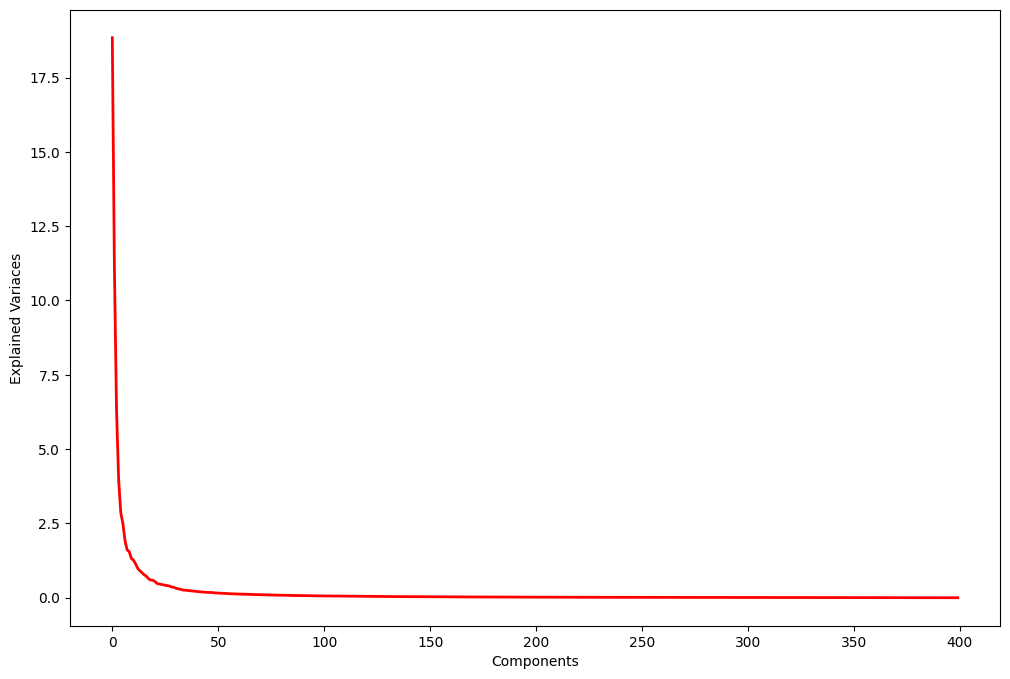

In [43]:

pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2, color='red')
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [44]:
components=50 # As per the graph this is the number of components and after that the variance is constant

pca = PCA(n_components=components,svd_solver='auto')
pca.fit(X_train)

PCA(n_components=50)

In [45]:
pca.components_.shape

(50, 2048)

Text(0.5, 1.0, 'Average Face')

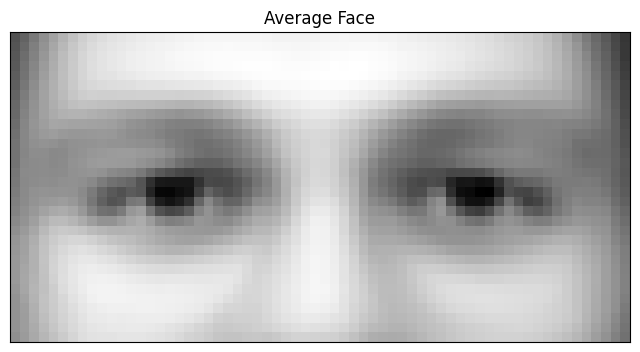

In [46]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((32,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [47]:
pca.components_[0]

array([0.01172566, 0.01577614, 0.02030132, ..., 0.01935436, 0.01722758,
       0.01391482])

Text(0.5, 0.98, 'All Eigen Faces')

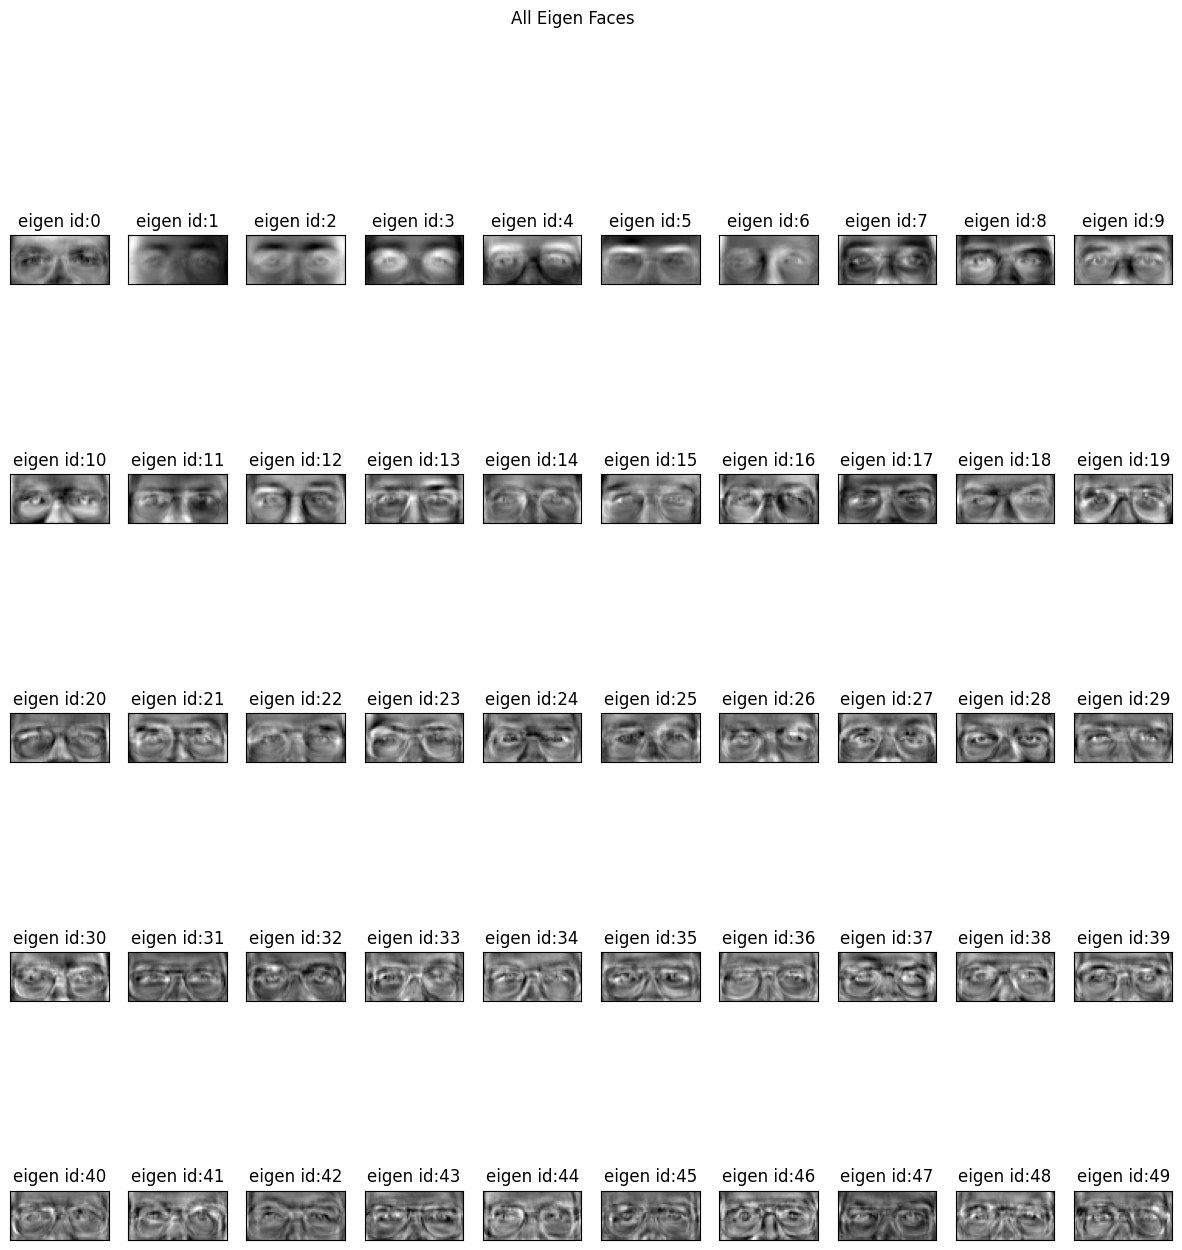

In [48]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, pixels[0], pixels[1]))

cols = 10
rows = int(number_of_eigenfaces / cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces")

In [49]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
pca1 = PCA(n_components=components,svd_solver='auto')
Y_train_pca1=pca1.fit_transform(Y_train)
Y_test_pca1=pca1.transform(Y_test)

In [50]:
X_train_pca.shape, X_test_pca.shape , Y_train_pca1.shape, Y_test_pca1.shape

((380, 50), (20, 50), (380, 50), (20, 50))

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

In [52]:
param_grid = {
    "Random Forest": [200, 500],
    "Extra Trees": [200, 500],
}

# Define estimators with different models
ESTIMATORS = {
    "Random Forest": [
        MultiOutputRegressor(RandomForestRegressor(n_estimators=n, random_state=0, n_jobs=-1)) 
        for n in param_grid["Random Forest"]
    ],
    "Extra Trees": [
        MultiOutputRegressor(ExtraTreesRegressor(n_estimators=n, random_state=0, n_jobs=-1)) 
        for n in param_grid["Extra Trees"]
    ],
}

# Train and evaluate models
results = {}
for name, models in ESTIMATORS.items():
    print(f"\nTraining {name} models...")
    for model in models:
        n_estimators = model.estimator.n_estimators  # Get the number of estimators for display
        
        # Train the model
        print(f"Training {name} with n_estimators={n_estimators}...")
        model.fit(X_train_pca, Y_train_pca1)  # Corrected Y_train_pca1
        
        # Predict on test data
        Y_pred_pca1 = model.predict(X_test_pca)  # Predicting on X_test_pca
        Y_pred = pca1.inverse_transform(Y_pred_pca1)  # Corrected inverse transform for PCA1
        
        # Compute MAE
        mae = mean_absolute_error(Y_test_pca1, Y_pred_pca1)  # MAE on PCA1-transformed data
        
        # Store results
        results[f"{name} (n_estimators={n_estimators})"] = {
            "model": model,
            "predictions": Y_pred,
            "mae": mae,
        }


Training Random Forest models...
Training Random Forest with n_estimators=200...
Training Random Forest with n_estimators=500...

Training Extra Trees models...
Training Extra Trees with n_estimators=200...
Training Extra Trees with n_estimators=500...


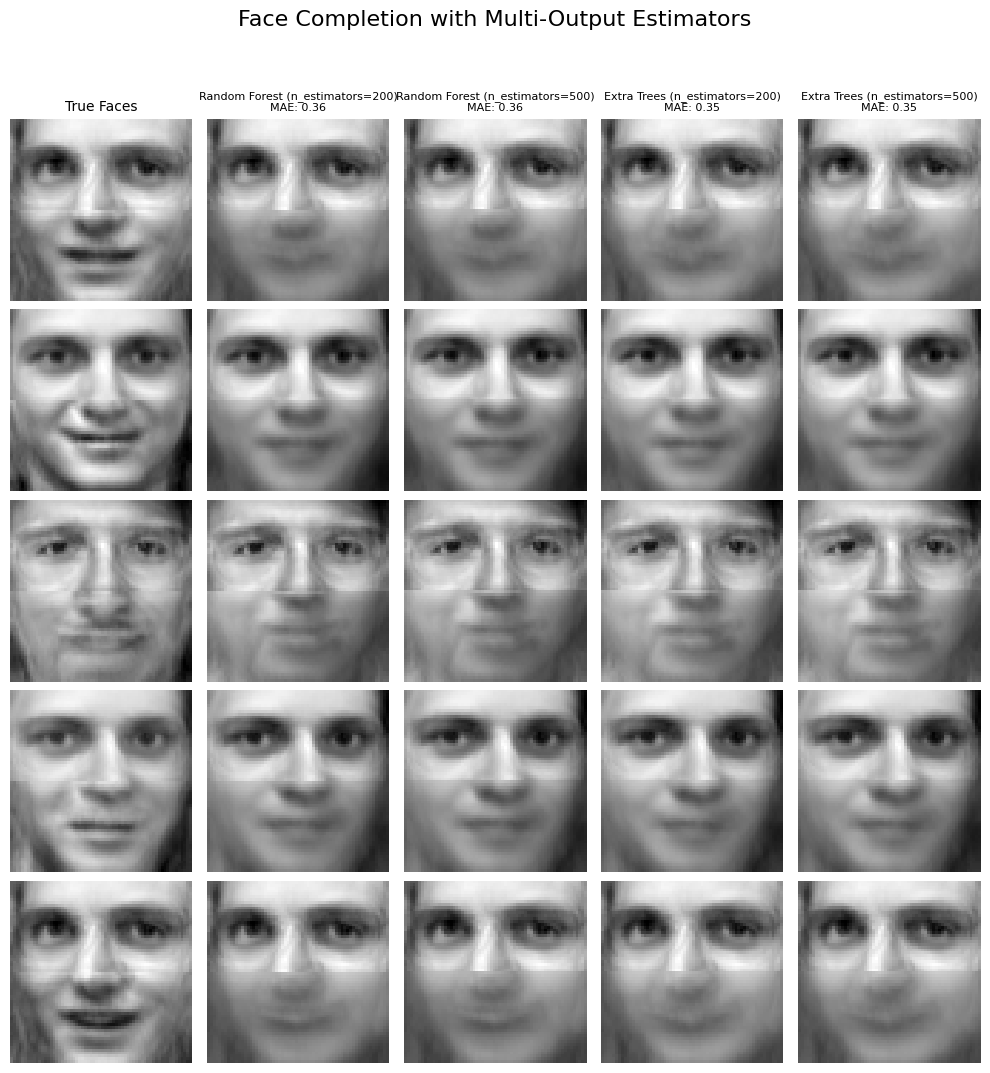

In [56]:
n_faces = 5  # Number of faces to plot
n_cols = 1 + len(results)  
image_shape = (64, 64)  

plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face Completion with Multi-Output Estimators", size=16)

for i in range(n_faces):

    X_upper = pca.inverse_transform(X_test_pca[i])  
    Y_lower_true = pca1.inverse_transform(Y_test_pca1[i])  
    true_face = np.hstack((X_upper, Y_lower_true))

 
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    if i == 0:
        sub.set_title("True Faces", fontsize=10)
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap="gray", interpolation="nearest")


    for j, (name, result) in enumerate(results.items()):
        Y_lower_pred = result["predictions"][i]
        completed_face = np.hstack((X_upper, Y_lower_pred))

        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        if i == 0:
            sub.set_title(f"{name}\nMAE: {result['mae']:.2f}", fontsize=8)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap="gray", interpolation="nearest")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
